In [108]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
from datetime import datetime

CPU times: total: 15.6 ms
Wall time: 16 ms


In [109]:
pd.set_option('display.max_columns', None)
data=pd.read_excel(r'F:\All_Projects\Data Sets\MovitforAnalysis.xlsx')

In [110]:
data.head(1)

,Timestamp,What is the Outlet Name?,What is the Outlet Region ?,What is the Outlet Location ?,What is the Identifying Mark?,What is the sales representative's name?,What is the Last Delivery Date?,Is the Shelf display present ? If yes: Where is the display?,Select type of channel,Is the Retailer Aware of any promo?,Is the Current Poster for the current Promo?,Is the Shelf display present ? \nIf yes: Where is the display?,What Through-the-Line support is available?,Are Consumers and Gate Keepers Brand aware?,Is Brand Positioning & Benefits clearly communicated?,Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?,Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?,Incentives: Are there Salesman penetration & stocking incentives?,Are sales incentives sales performance (sell-in/sell-out) or trade execution based?,what's the delivery frequency?,"Are there Distributor/Stockiest loyalty Programs (e.g., the more you buy/sell, the more you earn in margins)?","Are there tech tools used to track RTM effectiveness – retail stock, trade execution, call completion etc.?","How disruptive or clear is the POSM – to stand out, drive education & awareness?",How well executed is the POSM in retail outlets vs standard?,Is there a retail execution standard that merchandisers follow?,Is POSM readily available and refreshed frequently enough to reflect freshness?,Does current pricing and margin structure suit competitiveness?,Are prices & margin structures well communicated?,What’s the level of price and margin structure compliance?,Are retail promotions tailored and targeted based on channel & outlet prioritization & performance?,How is sampling targeting consumers differentiated from gatekeepers?,How are strategic partnerships (adjacencies) & New-to-World channels managed?,What Influencer Digital or otherwise Programs are currently running?,Are Testimonial Campaigns embedded for messaging efficacy?,Are gatekeepers given special attention?,Are gatekeepers given special attention?.1,Are there CSR & Sponsorships tie-ins for relevant environments?,Are there CSR & Sponsorships tie-ins for relevant environments?.1,Email Address,What is the Stock available (Eas) for 4000608 MOVIT BABY JELLY 200G?,What is the Rate of Sales (per Week) for 4000608 MOVIT BABY JELLY 200G?,What is the Stock Displayed (Shelf) for 4000608 MOVIT BABY JELLY 200G?,What is the Stock in Storage for 4000608 MOVIT BABY JELLY 200G?,What is the Expiry Date for 4000608 MOVIT BABY JELLY 200G?,What is the Price Bought at for 4000608 MOVIT BABY JELLY 200G?,What is the Price Selling at for 4000608 MOVIT BABY JELLY 200G?,What is the Stock available (Eas) for 4000008 MOVIT BABY JELLY 20G?,What is the Rate of Sales (per Week) for 4000008 MOVIT BABY JELLY 20G?,What is the Stock in Storage for 4000008 MOVIT BABY JELLY 20G?,What is the Rate of Sales (per Week) for 4000008 MOVIT BABY JELLY 20G?.1,What is the Expiry Date for 4000008 MOVIT BABY JELLY 20G?,What is the Price Bought at for 4000008 MOVIT BABY JELLY 20G?,What is the Price Selling at for 4000008 MOVIT BABY JELLY 20G?,What is the stock available (Eas) for 4000499 MOVIT BABY JELLY 50G?,What is the Rate of Sales (per Week) for 4000499 MOVIT BABY JELLY 50G?,What is the Stock Displayed (Shelf) for 4000499 MOVIT BABY JELLY 50G?,What is the Stock in Storage for 4000499 MOVIT BABY JELLY 50G?,What is the Expiry Date for 4000499 MOVIT BABY JELLY 50G?,What is the Price Bought at for 4000499 MOVIT BABY JELLY 50G?,What is the Price Selling at for 4000499 MOVIT BABY JELLY 50G?,What is the stock available (Eas) for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Rate of Sales (per Week) for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Stock Displayed (Shelf) for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Stock in Storage for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Expiry Date for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Price Bought at for 4000022 MOVIT B

In [111]:
data['Timestamp'] = data['Timestamp'].dt.date

In [112]:
data.head(2)

,Timestamp,What is the Outlet Name?,What is the Outlet Region ?,What is the Outlet Location ?,What is the Identifying Mark?,What is the sales representative's name?,What is the Last Delivery Date?,Is the Shelf display present ? If yes: Where is the display?,Select type of channel,Is the Retailer Aware of any promo?,Is the Current Poster for the current Promo?,Is the Shelf display present ? \nIf yes: Where is the display?,What Through-the-Line support is available?,Are Consumers and Gate Keepers Brand aware?,Is Brand Positioning & Benefits clearly communicated?,Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?,Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?,Incentives: Are there Salesman penetration & stocking incentives?,Are sales incentives sales performance (sell-in/sell-out) or trade execution based?,what's the delivery frequency?,"Are there Distributor/Stockiest loyalty Programs (e.g., the more you buy/sell, the more you earn in margins)?","Are there tech tools used to track RTM effectiveness – retail stock, trade execution, call completion etc.?","How disruptive or clear is the POSM – to stand out, drive education & awareness?",How well executed is the POSM in retail outlets vs standard?,Is there a retail execution standard that merchandisers follow?,Is POSM readily available and refreshed frequently enough to reflect freshness?,Does current pricing and margin structure suit competitiveness?,Are prices & margin structures well communicated?,What’s the level of price and margin structure compliance?,Are retail promotions tailored and targeted based on channel & outlet prioritization & performance?,How is sampling targeting consumers differentiated from gatekeepers?,How are strategic partnerships (adjacencies) & New-to-World channels managed?,What Influencer Digital or otherwise Programs are currently running?,Are Testimonial Campaigns embedded for messaging efficacy?,Are gatekeepers given special attention?,Are gatekeepers given special attention?.1,Are there CSR & Sponsorships tie-ins for relevant environments?,Are there CSR & Sponsorships tie-ins for relevant environments?.1,Email Address,What is the Stock available (Eas) for 4000608 MOVIT BABY JELLY 200G?,What is the Rate of Sales (per Week) for 4000608 MOVIT BABY JELLY 200G?,What is the Stock Displayed (Shelf) for 4000608 MOVIT BABY JELLY 200G?,What is the Stock in Storage for 4000608 MOVIT BABY JELLY 200G?,What is the Expiry Date for 4000608 MOVIT BABY JELLY 200G?,What is the Price Bought at for 4000608 MOVIT BABY JELLY 200G?,What is the Price Selling at for 4000608 MOVIT BABY JELLY 200G?,What is the Stock available (Eas) for 4000008 MOVIT BABY JELLY 20G?,What is the Rate of Sales (per Week) for 4000008 MOVIT BABY JELLY 20G?,What is the Stock in Storage for 4000008 MOVIT BABY JELLY 20G?,What is the Rate of Sales (per Week) for 4000008 MOVIT BABY JELLY 20G?.1,What is the Expiry Date for 4000008 MOVIT BABY JELLY 20G?,What is the Price Bought at for 4000008 MOVIT BABY JELLY 20G?,What is the Price Selling at for 4000008 MOVIT BABY JELLY 20G?,What is the stock available (Eas) for 4000499 MOVIT BABY JELLY 50G?,What is the Rate of Sales (per Week) for 4000499 MOVIT BABY JELLY 50G?,What is the Stock Displayed (Shelf) for 4000499 MOVIT BABY JELLY 50G?,What is the Stock in Storage for 4000499 MOVIT BABY JELLY 50G?,What is the Expiry Date for 4000499 MOVIT BABY JELLY 50G?,What is the Price Bought at for 4000499 MOVIT BABY JELLY 50G?,What is the Price Selling at for 4000499 MOVIT BABY JELLY 50G?,What is the stock available (Eas) for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Rate of Sales (per Week) for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Stock Displayed (Shelf) for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Stock in Storage for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Expiry Date for 4000022 MOVIT BODY MILK CREAM 250GM?,What is the Price Bought at for 4000022 MOVIT B

In [113]:
data['Select type of channel'].value_counts()

Select type of channel
Small Duka                     340
Salon                          108
Cosmetics Shop                  95
Large Duka                      89
Supermarket                     30
Kiosk                           21
Pharmacy                        18
Wholesaler                      14
Vendor                           7
Drug shop                        6
Boutique                         3
Retail and wholesale             1
sells plactics and utensils      1
Stationery                       1
Name: count, dtype: int64

In [114]:
def classify_outlets(value):
    if any(keyword in value for keyword in ['Supermarket']):
        return 'Supermarket'
    elif any(keyword in value for keyword in ['Pharmacy','Drug shop']):
        return 'Drug shop/Pharmacy'
    elif any(keyword in value for keyword in ['Cosmetics Shop']):
        return 'Cosmetics Shop'
    elif any(keyword in value for keyword in ['Salon']):
        return 'Salon'
    else:
        return 'Dukas'

In [115]:
data['Select type of channel'] = data['Select type of channel'].apply(classify_outlets)

In [116]:
data['Select type of channel'].value_counts()

Select type of channel
Dukas                 477
Salon                 108
Cosmetics Shop         95
Supermarket            30
Drug shop/Pharmacy     24
Name: count, dtype: int64

In [117]:

region_channel_counts = data.groupby(['What is the Outlet Region ?', 'Select type of channel'])['Select type of channel'].count().unstack()


region_totals = region_channel_counts.sum(axis=1)
region_channel_percentage = region_channel_counts.divide(region_totals, axis=0) * 100

region_channel_pivot = pd.concat([region_channel_counts, region_channel_percentage], axis=1, keys=['Count', 'Percentage'])


region_channel_pivot = region_channel_pivot.swaplevel(axis=1).sort_index(axis=1)

print(region_channel_pivot)



Select type of channel      Cosmetics Shop            Drug shop/Pharmacy  \
                                     Count Percentage              Count   
What is the Outlet Region ?                                                
Eastern Region                          70  19.774011                  2   
Rwenzori Region                         25   6.578947                 22   

Select type of channel                 Dukas            Salon             \
                            Percentage Count Percentage Count Percentage   
What is the Outlet Region ?                                                
Eastern Region                0.564972   210  59.322034    60  16.949153   
Rwenzori Region               5.789474   267  70.263158    48  12.631579   

Select type of channel      Supermarket             
                                  Count Percentage  
What is the Outlet Region ?                         
Eastern Region                       12   3.389831  
Rwenzori Region           

In [118]:
channel_counts = data['What is the Outlet Region ?'].value_counts()
print(channel_counts)

Number_of_outlets = len(data['What is the Outlet Region ?'])
print('Total outlets:', Number_of_outlets)



What is the Outlet Region ?
Rwenzori Region    380
Eastern Region     354
Name: count, dtype: int64
Total outlets: 734


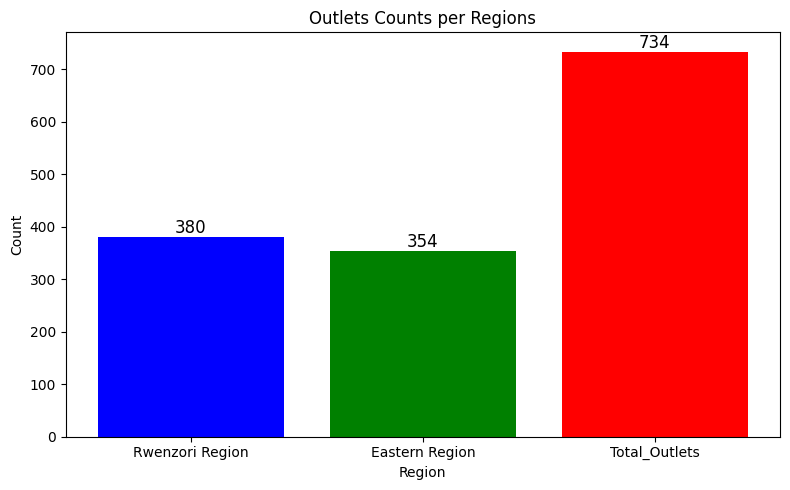

In [119]:

regions = ['Rwenzori Region', 'Eastern Region', 'Total_Outlets']
counts = [380, 354, 734]


plt.figure(figsize=(8, 5))
bars = plt.bar(regions, counts, color=['blue', 'green', 'red'])

plt.title('Outlets Counts per Regions')
plt.xlabel('Region')
plt.ylabel('Count')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


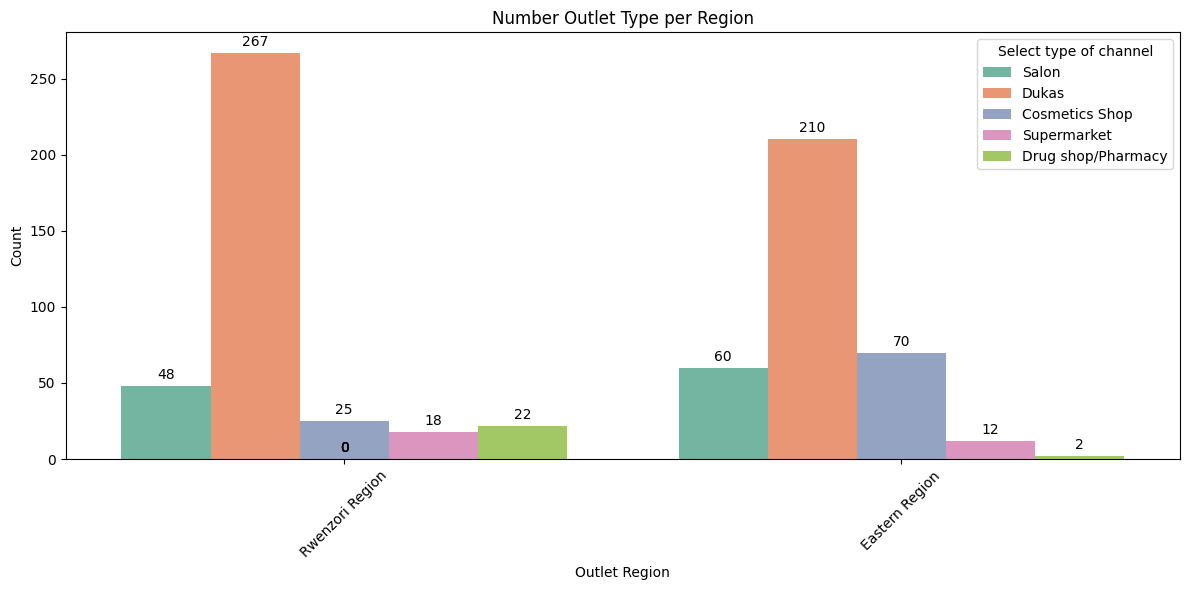

In [120]:

region_channel_counts = data.groupby(['What is the Outlet Region ?', 'Select type of channel'])['Select type of channel'].count().unstack()

region_channel_counts

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='What is the Outlet Region ?', hue='Select type of channel', palette='Set2')
plt.title('Number Outlet Type per Region')
plt.xlabel('Outlet Region')
plt.ylabel('Count')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
data['Is the Shelf display present ?  \nIf yes: Where is the display?'].value_counts()

Is the Shelf display present ?  \nIf yes: Where is the display?
Shelf behind attendant - visible as you enter                                                                                           248
Side Shelf  - visible as you enter                                                                                                       95
Shelf behind attendant - not visible as you enter                                                                                        79
Side Shelf  - not visible as you enter                                                                                                   75
Counter Top - visible as you enter                                                                                                       63
Shelf behind attendant - visible as you enter, Side Shelf  - visible as you enter                                                        56
Counter Top - visible as you enter, Shelf behind attendant - visible as you enter               

In [122]:
data["What’s the level of price and margin structure compliance?"].value_counts()

What’s the level of price and margin structure compliance?
Non compliant                                                                                               76
Low                                                                                                         46
Moderate                                                                                                    36
Not applicable                                                                                              32
Matching                                                                                                    27
                                                                                                            ..
Not aware of prices and margin                                                                               1
At first 18000 now at 11 8000 Movit herbal 200G and 50G prices were increased Abit and no profits at all     1
compliance is good                                   

In [123]:

data["What’s the level of price and margin structure compliance?"] = data["What’s the level of price and margin structure compliance?"].replace({
    'Low ': 'No',
    'Non compliant': 'No',
    'Moderate': 'Yes',
    'Not applicable': 'No',
    'Matching': 'Yes',
    'Not aware of prices and margin':'No',
    "It's matching":'No poster',
    'Yes to a grater extent they sell as the company recommends ':'Yes',
    'Low due to few distributors':'No',
    'Not aware of prices and margin ':'No',
    'No poster':'No',
    'Yes to a grater extent they sell as the company recommends':'Yes',
    'Low due to few distributors ':'No',
    'To extent ':'Yes',
    'Non compliant':'No',
    "Yes,they sell as instructed by the company":'Yes',
    'Average level':'Yes',
    'Prices not so bad but movit baby power is a bit expensive compared to glow':'No',
    'They sell according to companies recommendations ':'Yes',
    'Moderate ': 'Yes',
    'Non compliant ': 'No',
    'Not applicable': 'No',
    'not applicable':'No',
    'Low':'No',
    'Not applicable ': 'No',
    'Poor':'No',
    'Good':'Yes',
    'Poor ':'No',
    'good level': 'Yes',
    'Trying to sell to company standard': 'Yes',
    'Yes,they sell as instructed by the company ':'Yes',
    'No poster': 'No',
    'medium level, some shops are selling movit herbal at a higher price of 5500':'Yes',
    "They sell according to the company’s terms and conditions":'Yes',
    'Fair':'Yes',
    'Medium ':'Yes',
    'medium level ':'Yes',
    'medium level  ':'Yes',
    "Yes ,they sell according the company price":'Yes',
    "Yes,they are selling at the company recommended prices":'Yes',
    'Trying to sell to company standard':'Yes',
    'Balancing because she mostly sells at company price':'Yes'  
    
    
})

In [124]:
x = data["What’s the level of price and margin structure compliance?"].nunique()
print(x)

195


In [125]:
def classify_compliance(value):
    if pd.isna(value):
        return 'No' 
    
    value = str(value).lower() 
    
    if any(keyword in value for keyword in ['yes', 'Yes', 'high', 'most shops', 'clear penetration', 'breakthrough']):
        return 'Yes'

    
    else:
        return 'No'

In [126]:
data["What’s the level of price and margin structure compliance?"] = data["What’s the level of price and margin structure compliance?"].apply(classify_compliance)

In [127]:
data["What’s the level of price and margin structure compliance?"].value_counts()

What’s the level of price and margin structure compliance?
No     525
Yes    209
Name: count, dtype: int64

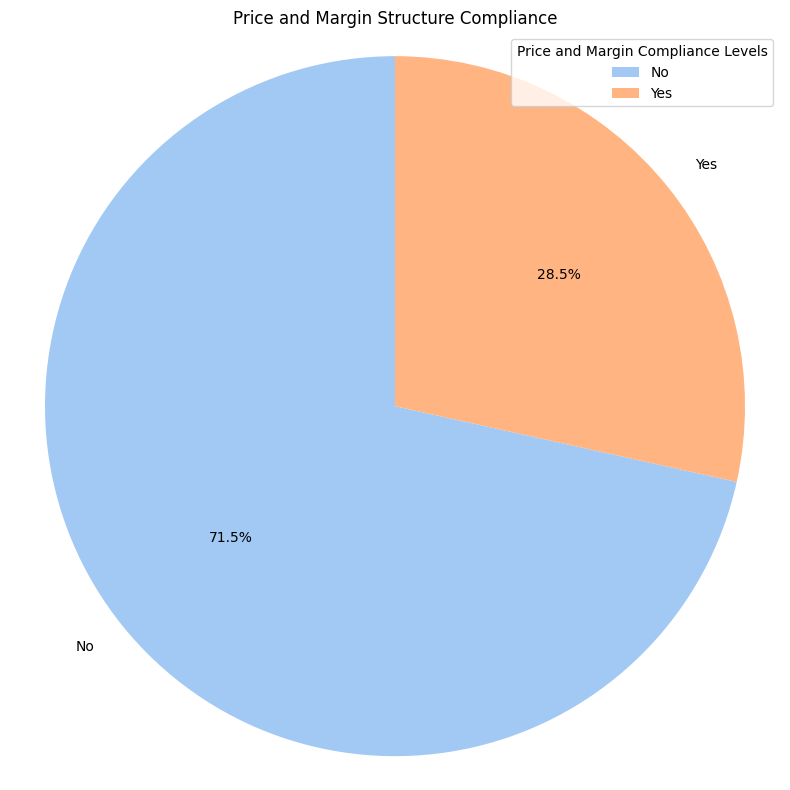

In [128]:
import matplotlib.pyplot as plt


compliance_counts = data['What’s the level of price and margin structure compliance?'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(compliance_counts, labels=compliance_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))


plt.legend(title="Price and Margin Compliance Levels", loc="best")

plt.axis('equal')


plt.title("Price and Margin Structure Compliance")

plt.tight_layout()
plt.show()


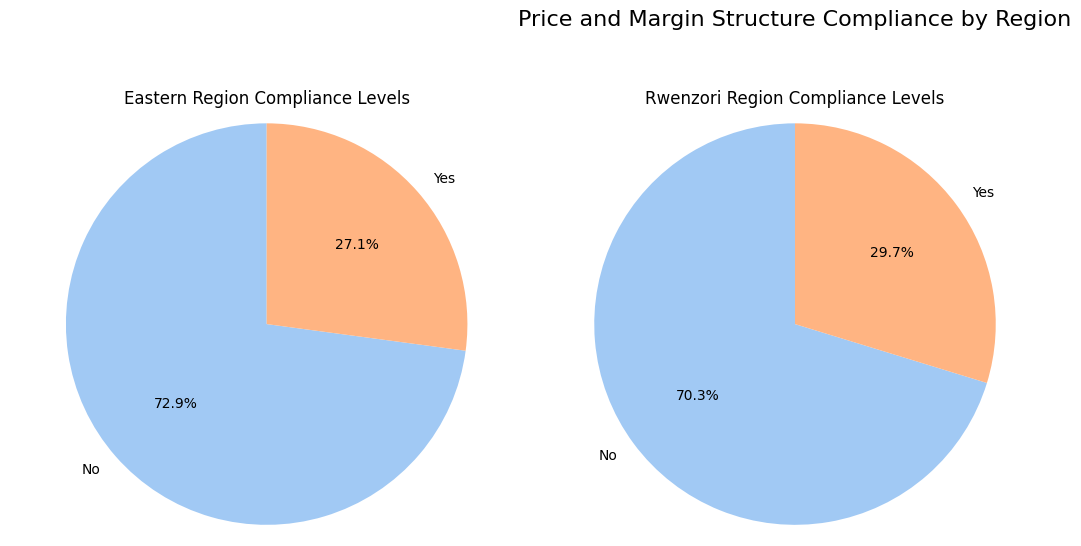

In [129]:
region_compliance = data.groupby(['What is the Outlet Region ?', 'What’s the level of price and margin structure compliance?']).size().unstack()

regions = region_compliance.index

plt.figure(figsize=(16, 10))

for i, region in enumerate(regions):
    plt.subplot(2, 3, i + 1) 
    compliance_counts = region_compliance.loc[region].dropna()

    plt.pie(compliance_counts, labels=compliance_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    

    plt.title(f'{region} Compliance Levels')

    plt.axis('equal')

plt.suptitle("Price and Margin Structure Compliance by Region", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [130]:
data['Is the Shelf display present ?  \nIf yes: Where is the display?'].value_counts()

Is the Shelf display present ?  \nIf yes: Where is the display?
Shelf behind attendant - visible as you enter                                                                                           248
Side Shelf  - visible as you enter                                                                                                       95
Shelf behind attendant - not visible as you enter                                                                                        79
Side Shelf  - not visible as you enter                                                                                                   75
Counter Top - visible as you enter                                                                                                       63
Shelf behind attendant - visible as you enter, Side Shelf  - visible as you enter                                                        56
Counter Top - visible as you enter, Shelf behind attendant - visible as you enter               

In [131]:
def classify_Shelf_display_present(value):

    if 'Shelf behind attendant - visible as you enter' in value and 'Side Shelf  - visible as you enter' in value and 'Counter Top - visible as you enter' in value:
        return 'Shelf behind attendant[Visible]'
    elif 'Shelf behind attendant - visible as you enter' in value and 'Side Shelf  - visible as you enter' in value:
        return 'Shelf behind attendant[Visible]'
    elif 'Shelf behind attendant - visible as you enter' in value and 'Counter Top - visible as you enter' in value:
        return 'Shelf behind attendant[Visible]'
    elif 'Side Shelf  - visible as you enter' in value and 'Counter Top - visible as you enter' in value:
        return 'Side Shelf[Visible]'


    if 'Shelf behind attendant - visible as you enter' in value and 'Shelf behind attendant - not visible as you enter' in value:
        return 'Shelf behind attendant[Visible]'
    elif 'Side Shelf  - visible as you enter' in value and 'Side Shelf  - not visible as you enter' in value:
        return 'Side Shelf[Visible]'
    elif 'Counter Top - visible as you enter' in value and 'Counter Top - not visible as you enter' in value:
        return 'Counter Top[Visible]'

    if 'Shelf behind attendant - visible as you enter' in value:
        return 'Shelf behind attendant[Visible]'
    elif 'Shelf behind attendant - not visible as you enter' in value:
        return 'Shelf behind attendant[Not Visible]'
    
    elif 'Side Shelf  - visible as you enter' in value:
        return 'Side Shelf[Visible]'
    elif 'Side Shelf  - not visible as you enter' in value:
        return 'Side Shelf[Not Visible]'
    
    elif 'Counter Top - visible as you enter' in value:
        return 'Counter Top[Visible]'
    elif 'Counter Top - not visible as you enter' in value:
        return 'Counter Top[Not Visible]'

    else:
        return 'Unclassified'


In [132]:
data['Shelf_display_presence'] = data['Is the Shelf display present ?  \nIf yes: Where is the display?'].apply(classify_Shelf_display_present)

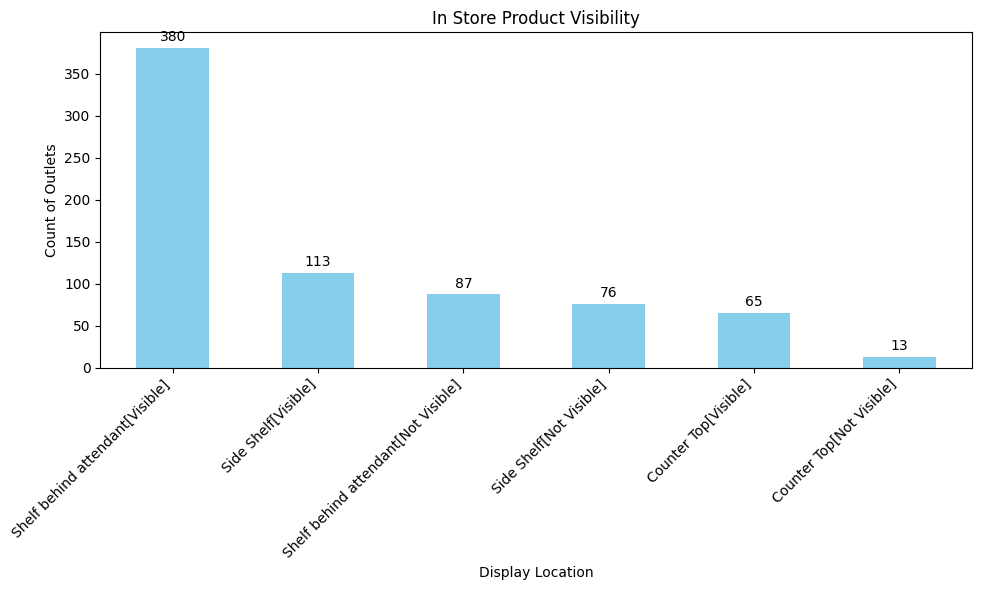

In [133]:
shelf_display_counts = data['Shelf_display_presence'].value_counts()

plt.figure(figsize=(10, 6))
ax = shelf_display_counts.plot(kind='bar', color='skyblue')


plt.title('In Store Product Visibility')
plt.xlabel('Display Location')
plt.ylabel('Count of Outlets')
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')  


plt.tight_layout()

plt.show()


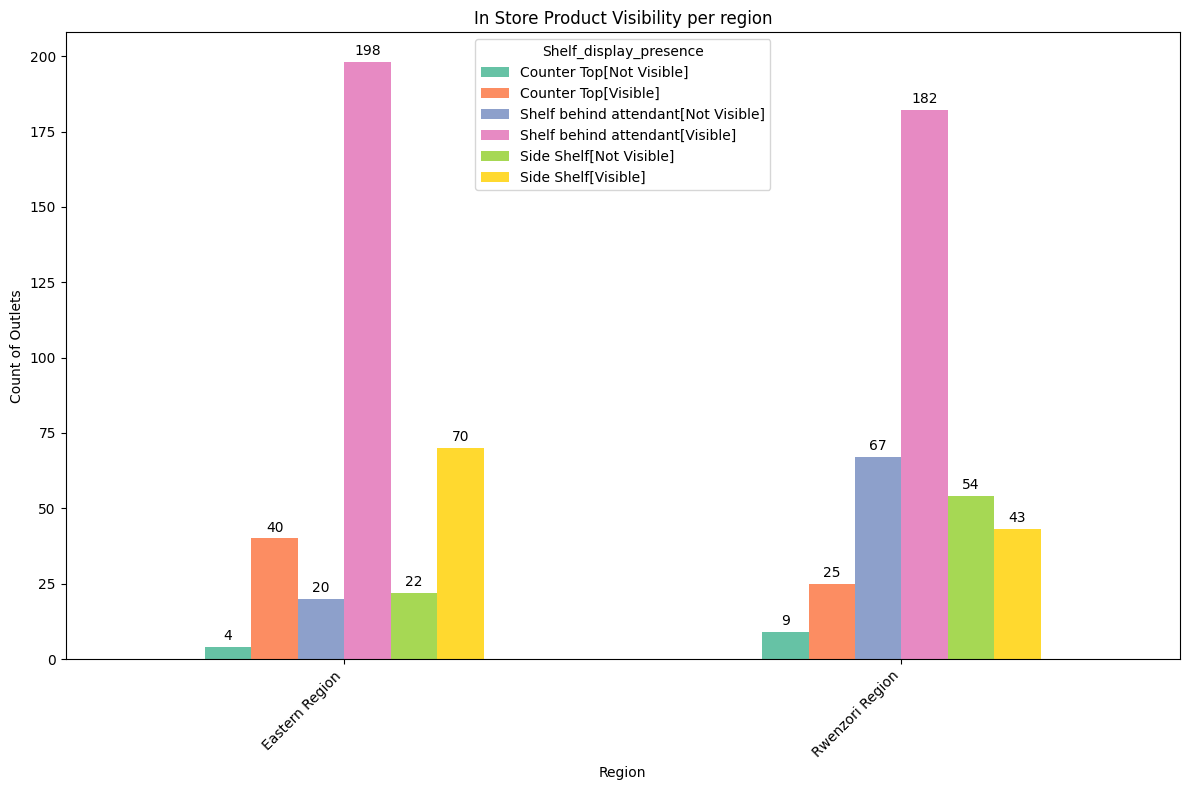

In [134]:

shelf_display_counts_by_region = data.groupby(['What is the Outlet Region ?', 'Shelf_display_presence']).size().unstack()


plt.figure(figsize=(12, 8))
shelf_display_counts_by_region.plot(kind='bar', stacked=False, ax=plt.gca(), color=sns.color_palette("Set2"))


plt.title('In Store Product Visibility per region')
plt.xlabel('Region')
plt.ylabel('Count of Outlets')


plt.xticks(rotation=45, ha='right')


ax = plt.gca()  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [135]:
data.columns.tolist()

['Timestamp',
 'What is the Outlet Name?',
 'What is the Outlet Region ?',
 'What is the Outlet Location ?',
 'What is the  Identifying Mark?',
 "What is the  sales representative's name?",
 'What is the Last Delivery Date?',
 'Is the Shelf display present ? If yes: Where is the display?',
 'Select type of channel',
 'Is the Retailer Aware of any promo?',
 'Is the Current Poster for the current Promo?',
 'Is the Shelf display present ?  \nIf yes: Where is the display?',
 'What Through-the-Line support is available?  ',
 'Are Consumers and Gate Keepers Brand aware?',
 'Is Brand Positioning & Benefits clearly communicated?',
 'Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?',
 'Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?',
 'Incentives: Are there Salesman penetration & stocking incentives?',
 'Are sales incentives sales performance (sell-in/sell-out) or trade execution based?',
 "what's the delivery fr

In [136]:
data['Is the Shelf display present ? If yes: Where is the display?'].value_counts()

Is the Shelf display present ? If yes: Where is the display?
No poster                                             70
At eye level, Visible as you enter, On the outside    43
Visible as you enter                                  37
Not available                                         36
No posters                                            33
                                                      ..
No poster since he doesn’t sell the products           1
This client is not interested in selling movit         1
Not visible as you enter, No posters                   1
This is a new prospect                                 1
poster is torn and was removed                         1
Name: count, Length: 177, dtype: int64

In [137]:
def classify_display(value):
    
    if pd.isna(value):
        return 'No poster available'  
    
    elif any(keyword in value for keyword in ['No', 'no', 'no ', 'Not ', 'torn']):
        return 'No poster available'
    else:
        return 'poster available'

In [138]:
data['Poster Presence']= data['Is the Shelf display present ? If yes: Where is the display?'].apply(classify_display)

In [139]:
data['Poster Presence'].value_counts()

Poster Presence
No poster available    502
poster available       232
Name: count, dtype: int64

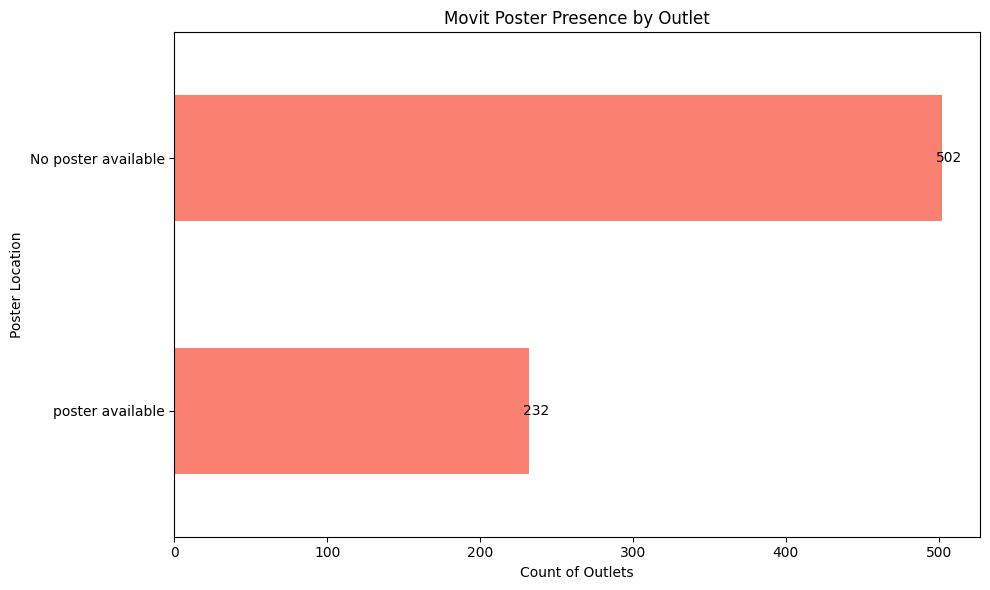

In [140]:
poster_counts = data['Poster Presence'].value_counts()
top_poster_counts = poster_counts.nlargest(2).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = top_poster_counts.plot(kind='barh', color='salmon')


plt.title('Movit Poster Presence by Outlet')
plt.xlabel('Count of Outlets')
plt.ylabel('Poster Location')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()

plt.show()


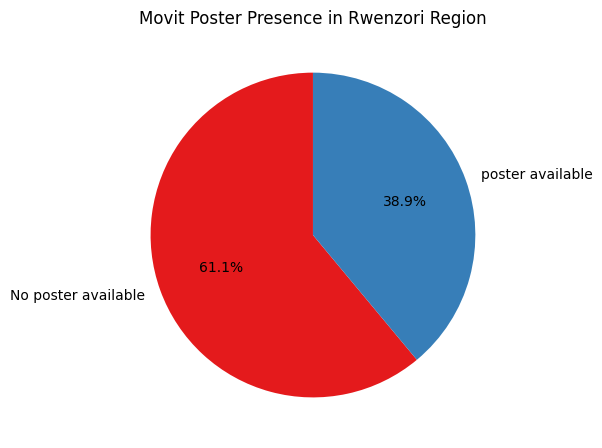

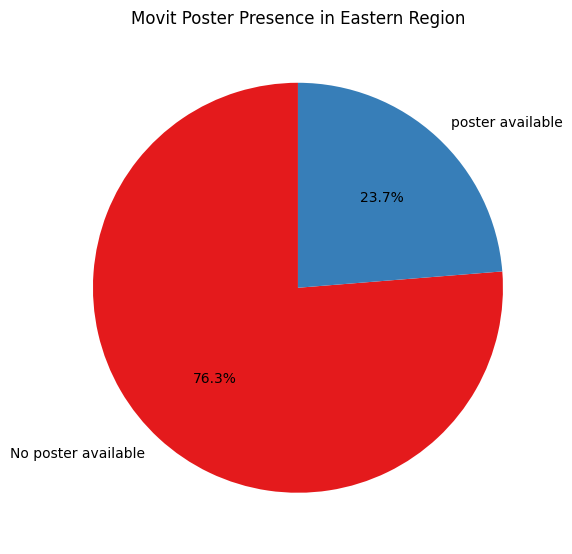

In [141]:

unique_regions = data['What is the Outlet Region ?'].unique()

for region in unique_regions:

    poster_counts_in_region = data[data['What is the Outlet Region ?'] == region]['Poster Presence'].value_counts()


    plt.figure(figsize=(6, 6))
    plt.pie(poster_counts_in_region, labels=poster_counts_in_region.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))

    plt.title(f'Movit Poster Presence in {region}')

    plt.tight_layout()
    plt.show()



In [142]:
#Brand Awareness
data['Are Consumers and Gate Keepers Brand aware?'] = data['Are Consumers and Gate Keepers Brand aware?'].replace({
    'Not applicable': 'Not applicable',
    'not applicable': 'Not applicable',
    'Not applicable ': 'Not applicable',
    'no applicable': 'Not applicable'  
})

In [143]:
data['Are Consumers and Gate Keepers Brand aware?'].isnull().sum()

6

In [144]:
data['Are Consumers and Gate Keepers Brand aware?'] = data['Are Consumers and Gate Keepers Brand aware?'].fillna(data['Are Consumers and Gate Keepers Brand aware?'].mode()[0])

In [145]:
data['Are Consumers and Gate Keepers Brand aware?'].isnull().sum()

0

In [146]:
def classify_awareness(value): 
    
    if any(keyword in value for keyword in ['No', 'no', 'no ']):
        return 'No'
    elif any(keyword in value for keyword in ['Yes', 'yes', 'yes ', 'Yes']):
        return 'Yes'
    else:
        return 'Not applicable'

In [147]:
data['Are Consumers and Gate Keepers Brand aware?'] = data['Are Consumers and Gate Keepers Brand aware?'].apply(classify_awareness)

In [148]:
data['Are Consumers and Gate Keepers Brand aware?'].value_counts()

Are Consumers and Gate Keepers Brand aware?
Yes               500
No                210
Not applicable     24
Name: count, dtype: int64

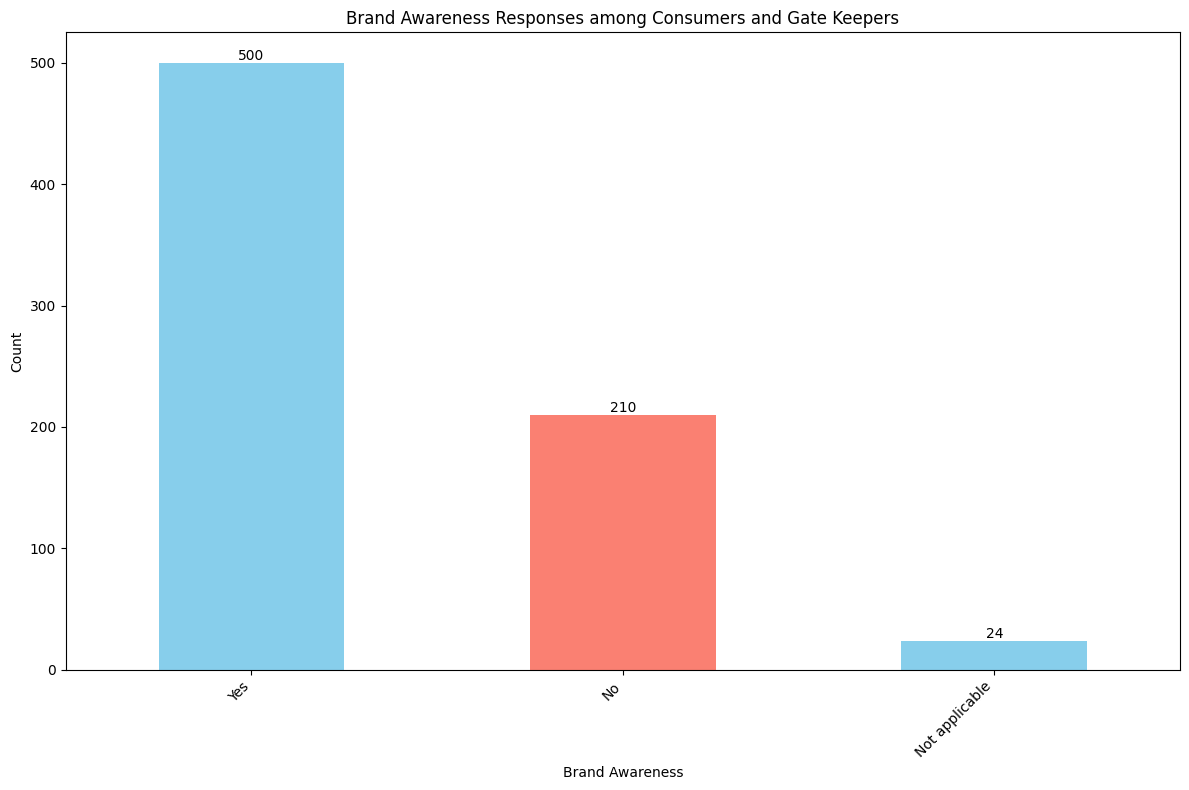

In [149]:
brand_awareness_counts = data['Are Consumers and Gate Keepers Brand aware?'].value_counts()

top_brand_awareness = brand_awareness_counts.nlargest(10).sort_values(ascending=False) 

plt.figure(figsize=(12, 8))
ax = top_brand_awareness.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Brand Awareness Responses among Consumers and Gate Keepers')
plt.xlabel('Brand Awareness')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(False)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                int(height), 
                ha='center', va='bottom')
            
plt.tight_layout()
plt.show()

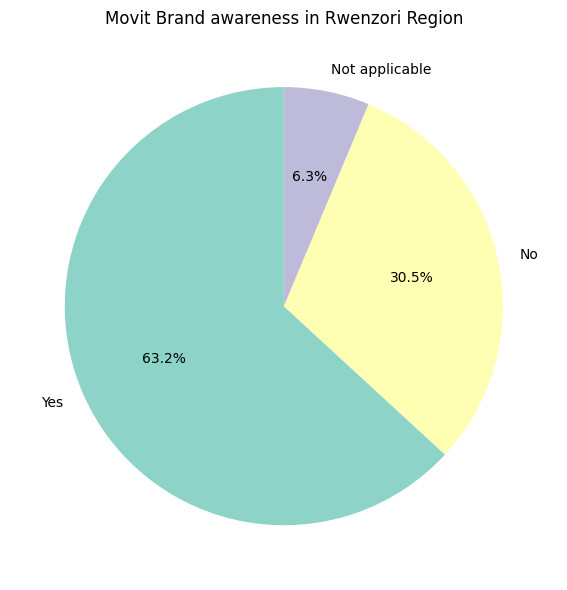

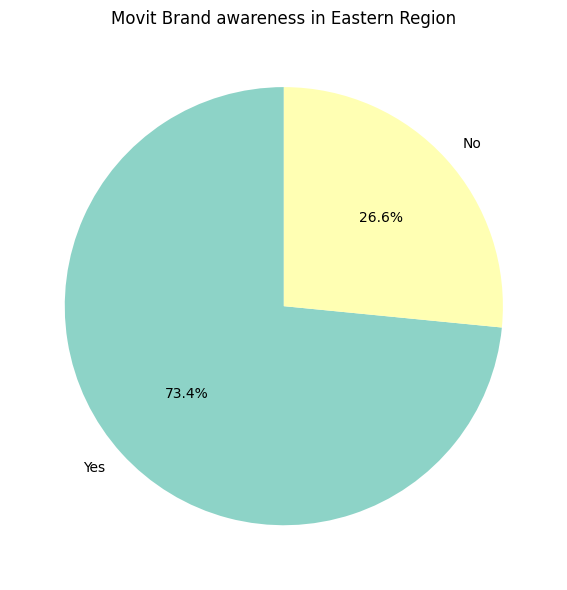

In [150]:


unique_regions = data['What is the Outlet Region ?'].unique()

for region in unique_regions:

    poster_counts_in_region = data[data['What is the Outlet Region ?'] == region]['Are Consumers and Gate Keepers Brand aware?'].value_counts()

    if not poster_counts_in_region.empty:

        plt.figure(figsize=(6, 6))
        plt.pie(poster_counts_in_region, labels=poster_counts_in_region.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))


        plt.title(f'Movit Brand awareness in {region}')

        plt.tight_layout()
        plt.show()


In [151]:
first_20_columns = data.columns.to_list()[:20]
print(first_20_columns)

['Timestamp', 'What is the Outlet Name?', 'What is the Outlet Region ?', 'What is the Outlet Location ?', 'What is the  Identifying Mark?', "What is the  sales representative's name?", 'What is the Last Delivery Date?', 'Is the Shelf display present ? If yes: Where is the display?', 'Select type of channel', 'Is the Retailer Aware of any promo?', 'Is the Current Poster for the current Promo?', 'Is the Shelf display present ?  \nIf yes: Where is the display?', 'What Through-the-Line support is available?  ', 'Are Consumers and Gate Keepers Brand aware?', 'Is Brand Positioning & Benefits clearly communicated?', 'Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?', 'Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?', 'Incentives: Are there Salesman penetration & stocking incentives?', 'Are sales incentives sales performance (sell-in/sell-out) or trade execution based?', "what's the delivery frequency?"]


In [152]:
#Brand Awareness
data['Is Brand Positioning & Benefits clearly communicated?'] = data['Is Brand Positioning & Benefits clearly communicated?'].replace({
    'Not applicable': 'Not applicable',
    'not applicable': 'Not applicable',
    'Not applicable ': 'Not applicable',
    'no applicable': 'Not applicable',
    'yes': 'Yes',
    'Yes ': 'Yes',
    'No ': 'No',
    'No.': 'No',
    'Not': 'No',
    'Not ': 'No',
    'Not clearly communicated': 'No',
    'Not clear': 'No'  
    
})

In [153]:
data['Is Brand Positioning & Benefits clearly communicated?'].value_counts()

Is Brand Positioning & Benefits clearly communicated?
Yes                                                 197
No                                                  161
Not applicable                                       66
No and benefits aren't known                         24
Benefits aren't known                                16
                                                   ... 
not appplicable                                       1
NO                                                    1
Movit Products are most distributed in the shop       1
This a prospect                                       1
yes its well positioned                               1
Name: count, Length: 148, dtype: int64

In [154]:
def classify_brand(value): 
    
    if any(keyword in value for keyword in ['No', 'no', 'no ',]):
        return 'No'
    elif any(keyword in value for keyword in ['Yes', 'yes', 'yes ', 'Yes']):
        return 'Yes'
    else:
        return 'Not applicable'

In [155]:
data['Is Brand Positioning & Benefits clearly communicated?'].isnull().sum()

18

In [156]:
data['Is Brand Positioning & Benefits clearly communicated?'] = data['Is Brand Positioning & Benefits clearly communicated?'].fillna(data['Are Consumers and Gate Keepers Brand aware?'].mode()[0])

In [157]:
data['Is Brand Positioning & Benefits clearly communicated?'] = data['Is Brand Positioning & Benefits clearly communicated?'].apply(classify_brand)

In [158]:
data['Is Brand Positioning & Benefits clearly communicated?'].value_counts()

Is Brand Positioning & Benefits clearly communicated?
No                402
Yes               244
Not applicable     88
Name: count, dtype: int64

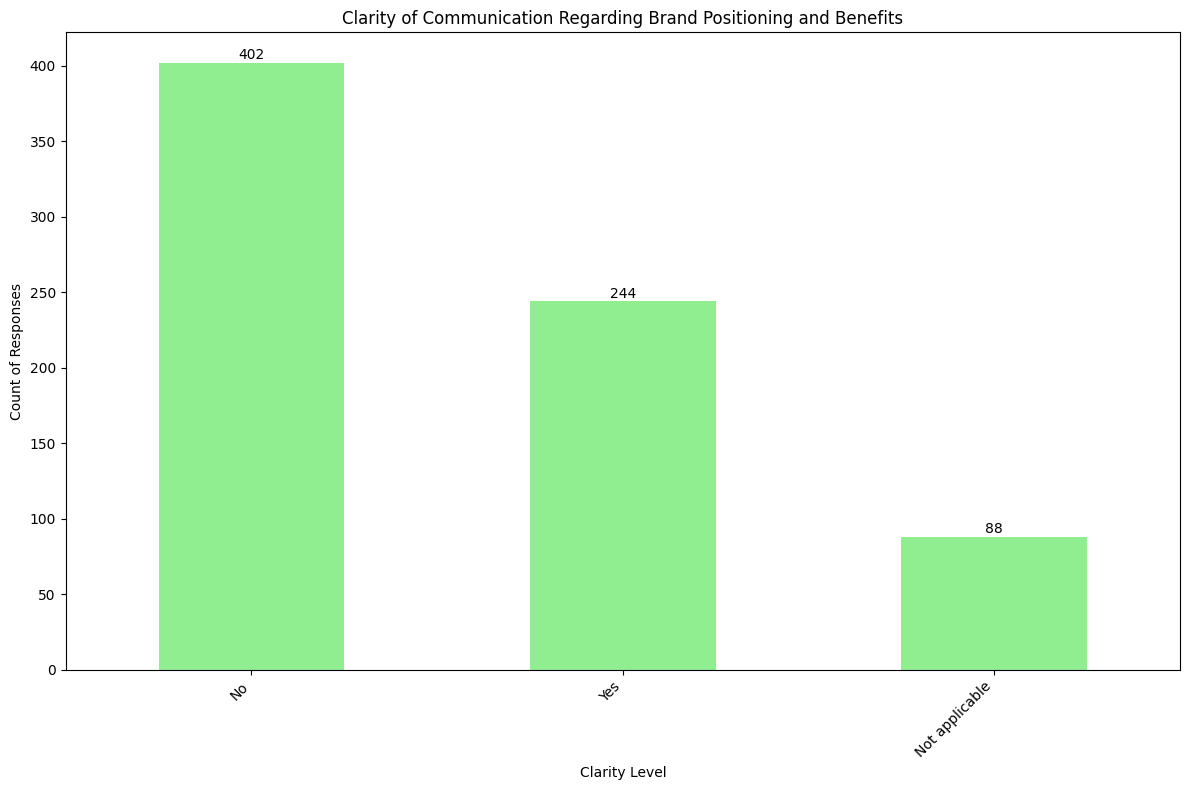

In [159]:
clarity_counts = data['Is Brand Positioning & Benefits clearly communicated?'].value_counts()

top_clarity_counts = clarity_counts.nlargest(10).sort_values(ascending=False) 

plt.figure(figsize=(12, 8)) 
top_clarity_counts.plot(kind='bar', color='lightgreen')

plt.title('Clarity of Communication Regarding Brand Positioning and Benefits')
plt.xlabel('Clarity Level')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45, ha='right')
plt.grid(False)

for index, value in enumerate(top_clarity_counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


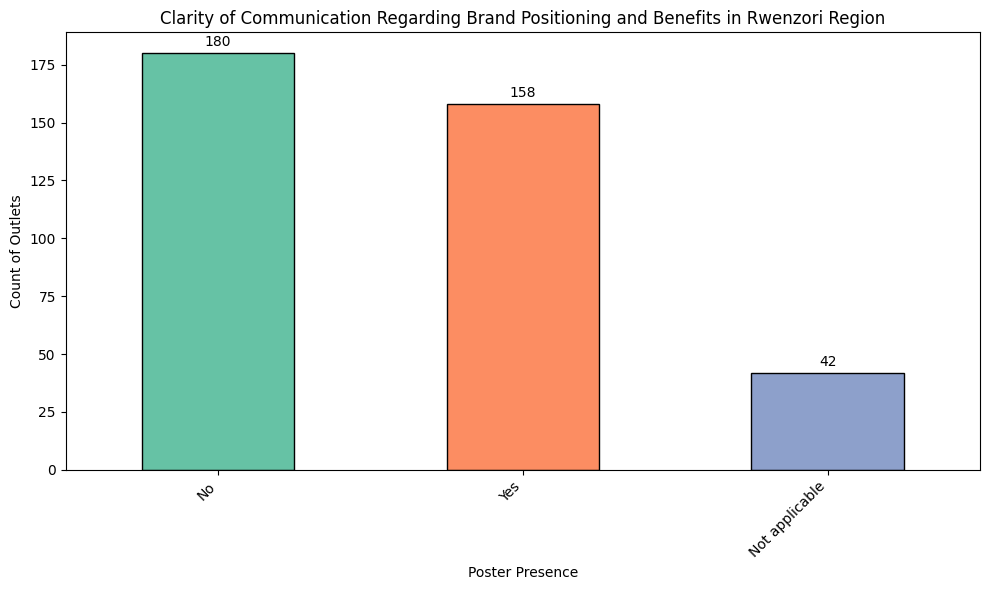

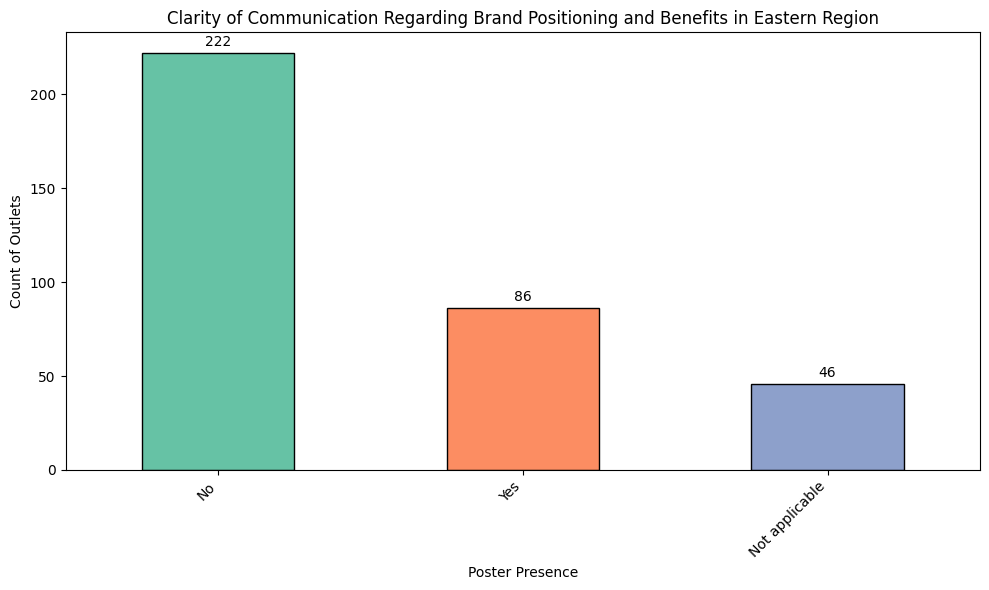

In [160]:

unique_regions = data['What is the Outlet Region ?'].unique()

for region in unique_regions:
  
    poster_counts_in_region = data[data['What is the Outlet Region ?'] == region]['Is Brand Positioning & Benefits clearly communicated?'].value_counts()

   
    if not poster_counts_in_region.empty:
       
        plt.figure(figsize=(10, 6))
        ax = poster_counts_in_region.plot(kind='bar', color=sns.color_palette('Set2'), edgecolor='black')

        plt.title(f'Clarity of Communication Regarding Brand Positioning and Benefits in {region}')
        plt.xlabel('Poster Presence')
        plt.ylabel('Count of Outlets')

        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')


        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


In [161]:
relationship_data = pd.crosstab(
    index=[data['Select type of channel'], data['Is the Retailer Aware of any promo?']],
    columns=data['Is the Current Poster for the current Promo?'],
    margins=True, 
    normalize='index' 
)

In [162]:
print(relationship_data)

Is the Current Poster for the current Promo?                      No       Yes
Select type of channel Is the Retailer Aware of any promo?                    
Cosmetics Shop         No                                   0.927273  0.072727
                       Yes                                  0.725000  0.275000
Drug shop/Pharmacy     No                                   1.000000  0.000000
                       Yes                                  1.000000  0.000000
Dukas                  No                                   0.962766  0.037234
                       Yes                                  0.868687  0.131313
Salon                  No                                   0.902778  0.097222
                       Yes                                  0.694444  0.305556
Supermarket            No                                   0.850000  0.150000
                       Yes                                  0.800000  0.200000
All                                                 

Is the Current Poster for the current Promo?   No  Yes
Is the Retailer Aware of any promo?                   
No                                            517   28
Yes                                           150   37


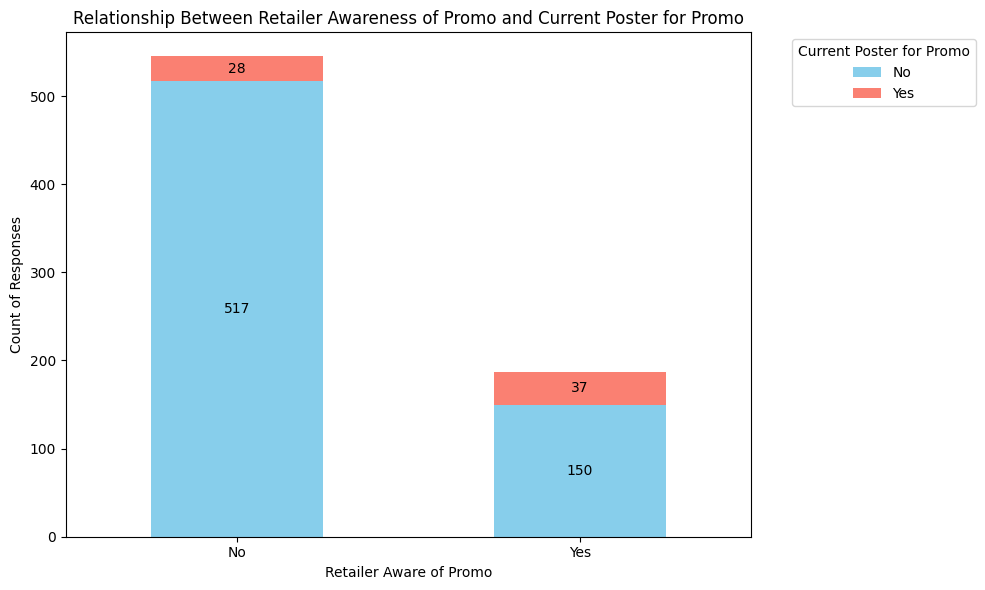

In [163]:
promo_awareness_vs_poster = pd.crosstab(data['Is the Retailer Aware of any promo?'],
                                        data['Is the Current Poster for the current Promo?'])

print(promo_awareness_vs_poster)

ax = promo_awareness_vs_poster.plot(kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'salmon'])


plt.title('Relationship Between Retailer Awareness of Promo and Current Poster for Promo')
plt.xlabel('Retailer Aware of Promo')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0)
plt.legend(title='Current Poster for Promo', bbox_to_anchor=(1.05, 1), loc='upper left')


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    
    if height > 0: 
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')


plt.tight_layout()

plt.show()


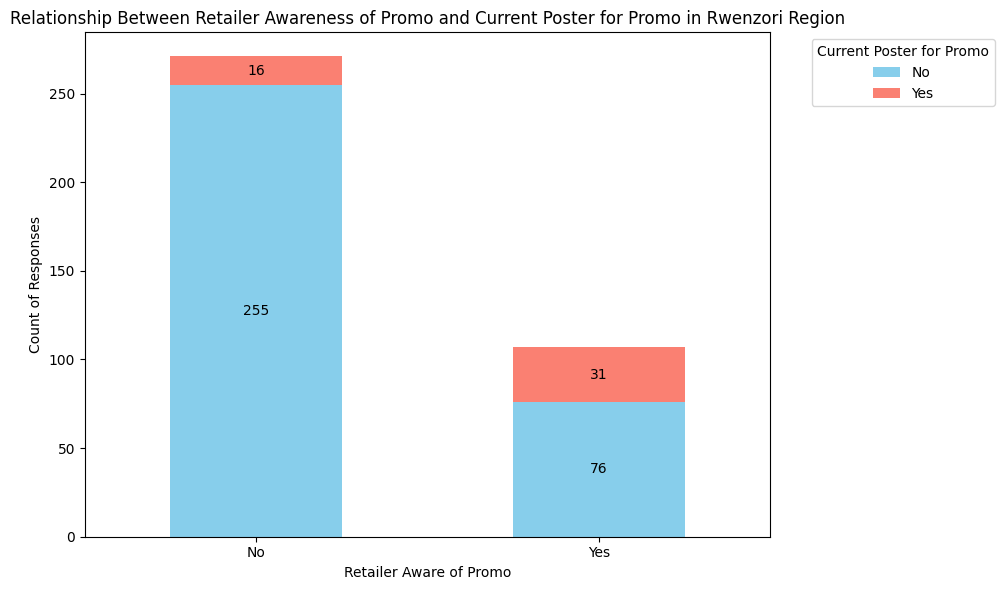

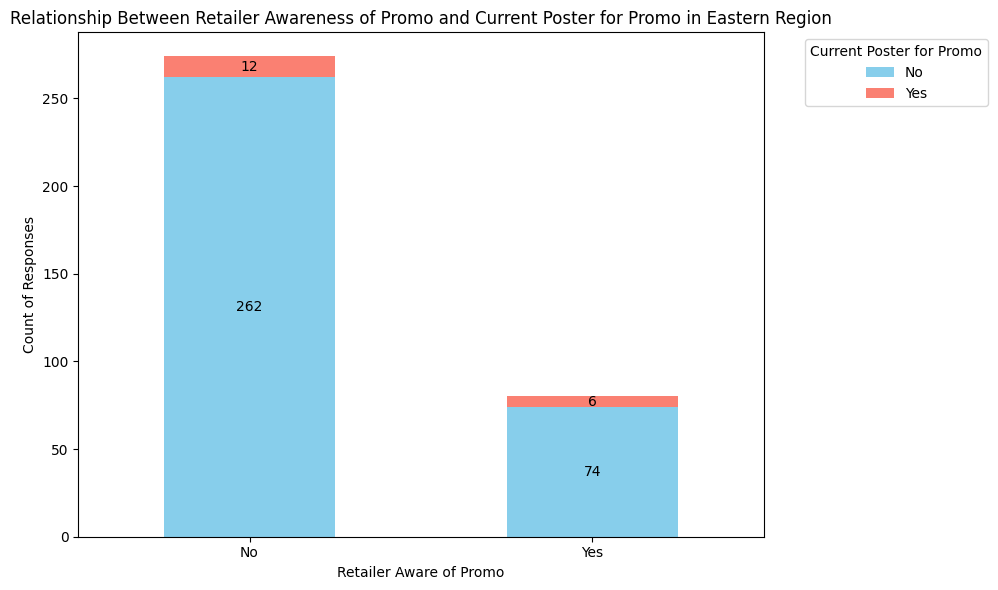

In [164]:

unique_regions = data['What is the Outlet Region ?'].unique()

for region in unique_regions:

    region_data = data[data['What is the Outlet Region ?'] == region]


    promo_awareness_vs_poster = pd.crosstab(region_data['Is the Retailer Aware of any promo?'],
                                            region_data['Is the Current Poster for the current Promo?'])

    if not promo_awareness_vs_poster.empty:

        plt.figure(figsize=(10, 6))
        ax = promo_awareness_vs_poster.plot(kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())


        plt.title(f'Relationship Between Retailer Awareness of Promo and Current Poster for Promo in {region}')
        plt.xlabel('Retailer Aware of Promo')
        plt.ylabel('Count of Responses')
        plt.xticks(rotation=0)
        plt.legend(title='Current Poster for Promo', bbox_to_anchor=(1.05, 1), loc='upper left')

        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x = p.get_x()
            y = p.get_y()

            if height > 0:
                ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

        plt.tight_layout()
        plt.show()


In [165]:
data.columns.to_list()

['Timestamp',
 'What is the Outlet Name?',
 'What is the Outlet Region ?',
 'What is the Outlet Location ?',
 'What is the  Identifying Mark?',
 "What is the  sales representative's name?",
 'What is the Last Delivery Date?',
 'Is the Shelf display present ? If yes: Where is the display?',
 'Select type of channel',
 'Is the Retailer Aware of any promo?',
 'Is the Current Poster for the current Promo?',
 'Is the Shelf display present ?  \nIf yes: Where is the display?',
 'What Through-the-Line support is available?  ',
 'Are Consumers and Gate Keepers Brand aware?',
 'Is Brand Positioning & Benefits clearly communicated?',
 'Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?',
 'Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?',
 'Incentives: Are there Salesman penetration & stocking incentives?',
 'Are sales incentives sales performance (sell-in/sell-out) or trade execution based?',
 "what's the delivery fr

count     734.000000
mean       -6.081744
std       234.555983
min     -1092.000000
25%         0.000000
50%         6.000000
75%        16.000000
max      1371.000000
Name: Delay (Days), dtype: float64


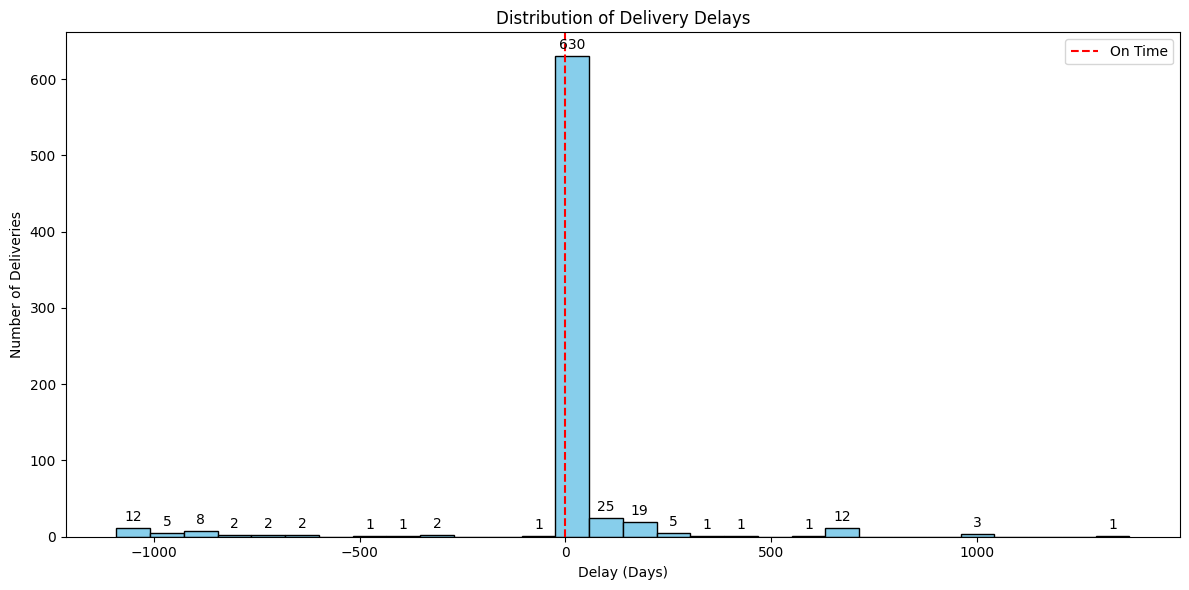

In [166]:


data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['What is the Last Delivery Date?'] = pd.to_datetime(data['What is the Last Delivery Date?'])


data['Delay (Days)'] = (data['Timestamp'] - data['What is the Last Delivery Date?']).dt.days


delay_summary = data['Delay (Days)'].describe()  
print(delay_summary)


plt.figure(figsize=(12, 6))
ax = plt.gca()  

ax.hist(data['Delay (Days)'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='On Time')
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delay (Days)')
plt.ylabel('Number of Deliveries')
plt.legend()


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')


plt.tight_layout()
plt.show()


Delay summary for Rwenzori Region:
 count     380.000000
mean       36.100000
std       204.314416
min     -1092.000000
25%         0.000000
50%         5.000000
75%        23.000000
max      1371.000000
Name: Delay (Days), dtype: float64


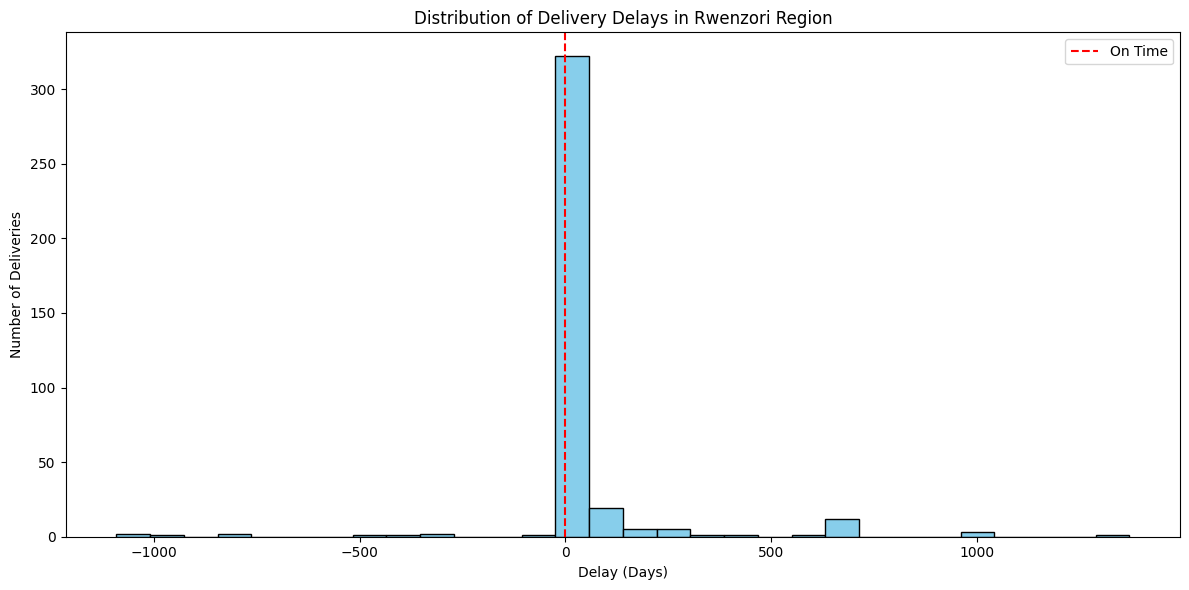

Delay summary for Eastern Region:
 count     354.000000
mean      -51.361582
std       255.833104
min     -1080.000000
25%         2.000000
50%         7.000000
75%        15.000000
max       216.000000
Name: Delay (Days), dtype: float64


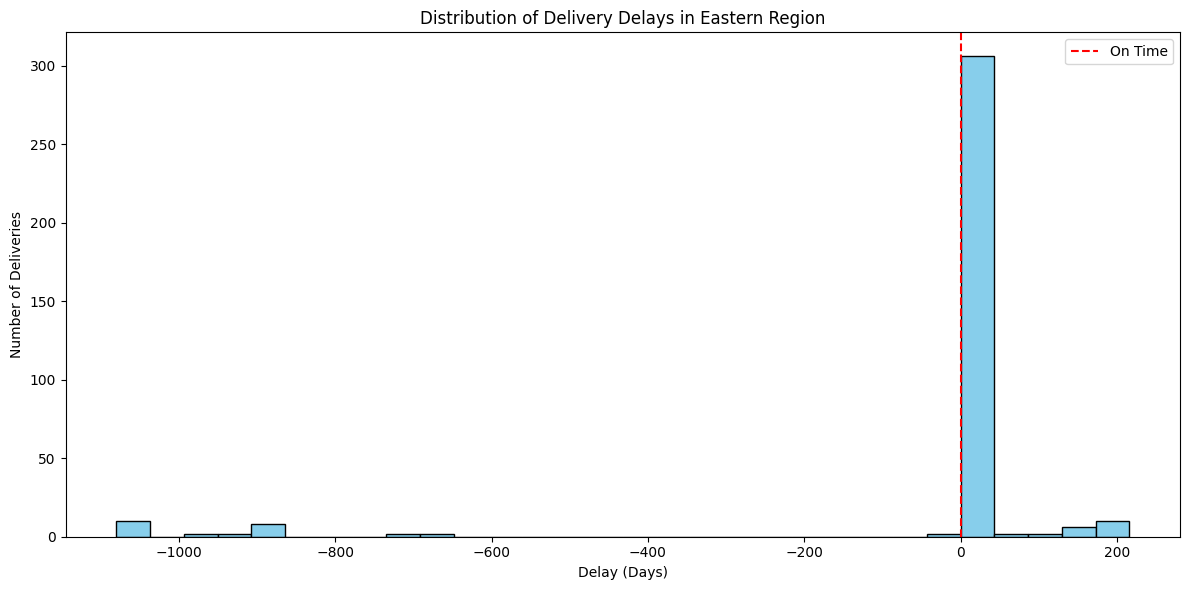

In [167]:

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['What is the Last Delivery Date?'] = pd.to_datetime(data['What is the Last Delivery Date?'])

data['Delay (Days)'] = (data['Timestamp'] - data['What is the Last Delivery Date?']).dt.days


unique_regions = data['What is the Outlet Region ?'].unique()

for region in unique_regions:

    region_data = data[data['What is the Outlet Region ?'] == region]

    delay_summary = region_data['Delay (Days)'].describe()
    print(f"Delay summary for {region}:\n", delay_summary)


    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    ax.hist(region_data['Delay (Days)'], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', label='On Time')
    plt.title(f'Distribution of Delivery Delays in {region}')
    plt.xlabel('Delay (Days)')
    plt.ylabel('Number of Deliveries')
    plt.legend()


    plt.tight_layout()
    plt.show()


In [168]:
#Delivery Timeliness
data['what\'s the delivery frequency?'].value_counts()

what's the delivery frequency?
1X a week                                       158
1X a month                                      153
2X a month                                       93
2X a week                                        46
Not applicable                                   27
                                               ... 
Products not available                            1
1X a week, Not a client                           1
3X a week, Stoped                                 1
Stopped purchasing                                1
1X a month, At times it depends on purchase       1
Name: count, Length: 121, dtype: int64

In [169]:
data['what\'s the delivery frequency?'] = data['what\'s the delivery frequency?'].replace ({
    
    'Not applicable': 'Not applicable',
    'Not applicable ': 'Not applicable',
    'not applicable ': 'Not applicable',
    'not applicable': 'Not applicable',
    'no applicable': 'Not applicable',
    'Once a week ': '1X a week',
    'Once a week': '1X a week',
    'No delivery at all': 'No delivery',
    'No delivery ': 'No delivery'
  
})

In [170]:
def classify_frequency(value): 
    
    if any(keyword in value for keyword in ['1X a week','Once a week']):
        return '1X a week'
    elif any(keyword in value for keyword in ['1X a month']):
        return '1X a month'
    elif any(keyword in value for keyword in ['2X a month']):
        return '2X a month'
    elif any(keyword in value for keyword in ['2X a week']):
        return '2X a week'
    elif any(keyword in value for keyword in ['Not applicable','no applicable','No delivery','No','Never']):
        return 'Self collect'
    else:
        return 'Prospect'

In [171]:
data['what\'s the delivery frequency?'] = data['what\'s the delivery frequency?'].fillna(data['what\'s the delivery frequency?'].mode()[0])

In [172]:
data['what\'s the delivery frequency?'] = data['what\'s the delivery frequency?'].apply(classify_frequency)

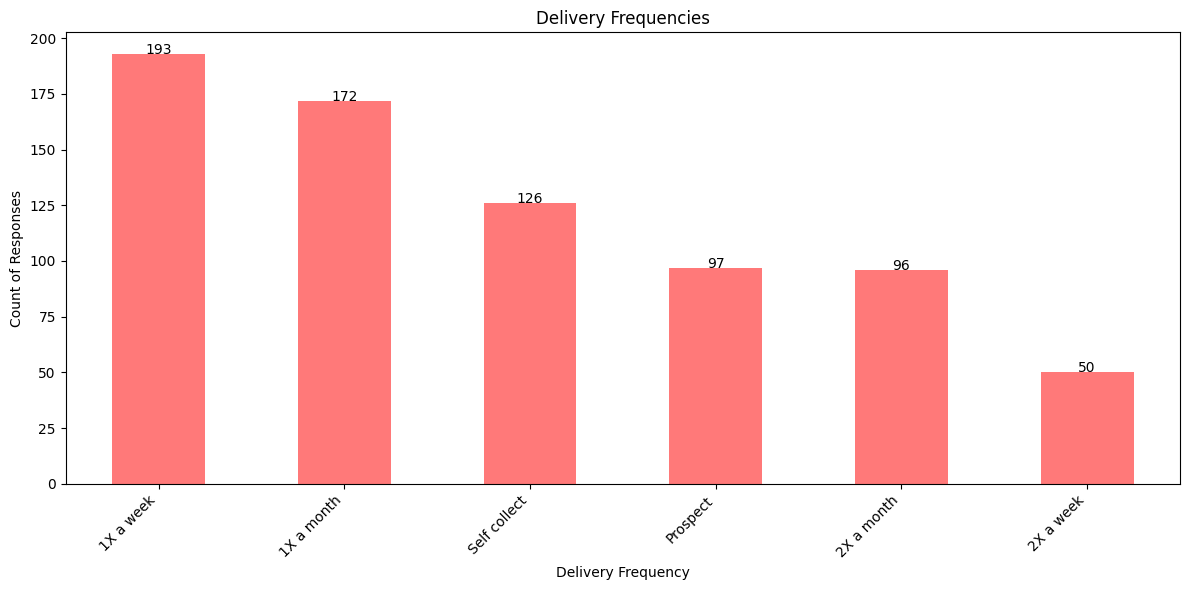

In [173]:
import matplotlib.pyplot as plt


top_delivery_frequency = data['what\'s the delivery frequency?'].value_counts().nlargest(20)


plt.figure(figsize=(12, 6))
ax = top_delivery_frequency.plot(kind='bar', color='#FF4040', alpha=0.7)


plt.title('Delivery Frequencies')
plt.xlabel('Delivery Frequency')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black')

plt.grid(False)
plt.tight_layout()
plt.show()


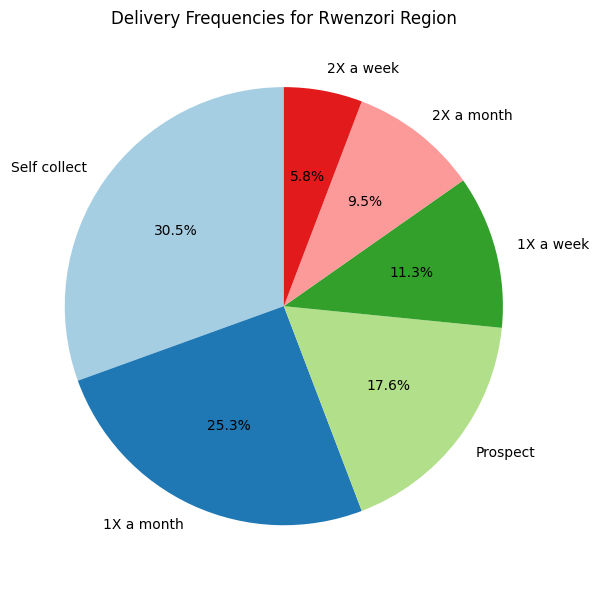

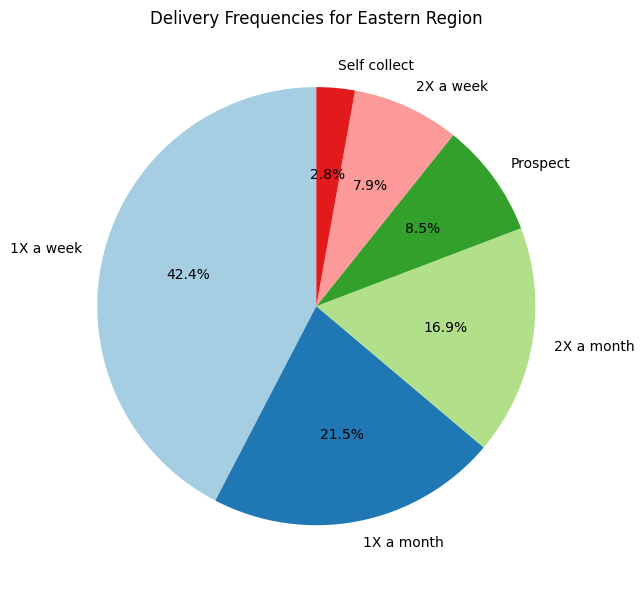

In [174]:

unique_regions = data['What is the Outlet Region ?'].unique()


for region in unique_regions:

    region_data = data[data['What is the Outlet Region ?'] == region]
    

    delivery_frequency_counts = region_data['what\'s the delivery frequency?'].value_counts().nlargest(20)

    plt.figure(figsize=(8, 6))
    plt.pie(delivery_frequency_counts, labels=delivery_frequency_counts.index, 
            autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    

    plt.title(f'Delivery Frequencies for {region}')
    

    plt.tight_layout()
    plt.show()


In [175]:
data['What Through-the-Line support is available?  '].value_counts()

What Through-the-Line support is available?  
Radio                                       76
Radio advertising                           36
Radios                                      34
Radio advertising                           30
Radio Adverts                               28
                                            ..
They watch tvs eg bukede and radios          1
Radio ads running on local radio station     1
Radios and ads                               1
They watch tvs like ntv and bukede           1
Life fm got fm and bukede tv                 1
Name: count, Length: 203, dtype: int64

In [176]:
data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'].value_counts()

Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?
Low stock pressure                                          61
No                                                          36
Not applicable                                              31
There is no stocking standard                               28
Not applicable                                              27
                                                            ..
No stock for now                                             1
No stocking standars                                         1
No stock due to high prices of movit products                1
medium pressure from sales team                              1
No the buying pressure is greater than selling pressure      1
Name: count, Length: 242, dtype: int64

In [177]:
data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'] = data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'].replace ({
    
    'Not applicable': 'Not applicable',
    'Not applicable ': 'Not applicable',
    'not applicable ': 'Not applicable',
    'not applicable': 'Not applicable',
    'no applicable': 'Not applicable',
    'No ': 'No standard',
    'No': 'No standard',
    'No there is stocking standard': 'No standard',
    'No there is stocking standard ': 'No standard',
    'There is no stocking standard': 'No standard',
    'No ,there is no stocking standard ': 'No standard',
    'Not following stocking standards': 'No standard',
    'No due to few or no distributors': 'No standard',
    'No standards followed': 'No standard',
    'No standards followed ': 'No standard',
    'No following stocking standards': 'No standard',
    'Low': 'Low stock pressure',
    'Low stock': 'Low stock pressure',
    'Low stock pressure ': 'Low stock pressure',
    "It's so low": 'Low stock pressure',
    "No following stocking standards": 'No standard',
    'The stock pressure is so low ': 'Low stock pressure',
    'stock pressure is low and sales team needs to visit more often': 'Low stock pressure'
  
})

In [178]:
data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'].isnull().sum()

28

In [179]:
data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'].value_counts()

Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?
Low stock pressure                                          101
No standard                                                  85
Not applicable                                               77
Yes                                                          15
Poor                                                         11
                                                           ... 
No stock due to high prices of movit products                 1
medium pressure from sales team                               1
Not. Following standards                                      1
No standards followed has general products                    1
No the buying pressure is greater than selling pressure       1
Name: count, Length: 228, dtype: int64

In [180]:
def classify_stock_pressure(value): 
    
    if any(keyword in value for keyword in ['Low stock pressure','Not applicable','no applicable','Poor','No standard','Medium','No stock','No stocking standard','No following stocking standards','There is no stocking standard']):
        return 'No-existent on principle'
    elif any(keyword in value for keyword in ['Yes','Well stocked','Good','Moderate']):
        return '4-6 days stock holding'
    else:
        return 'No-existent on principle'

In [181]:
data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'] = data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'].fillna('Yes')

In [182]:
data['Stock Pressure'] = data['Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?'].apply(classify_stock_pressure)

In [183]:
data['Stock Pressure'].value_counts()

Stock Pressure
No-existent on principle    649
4-6 days stock holding       85
Name: count, dtype: int64

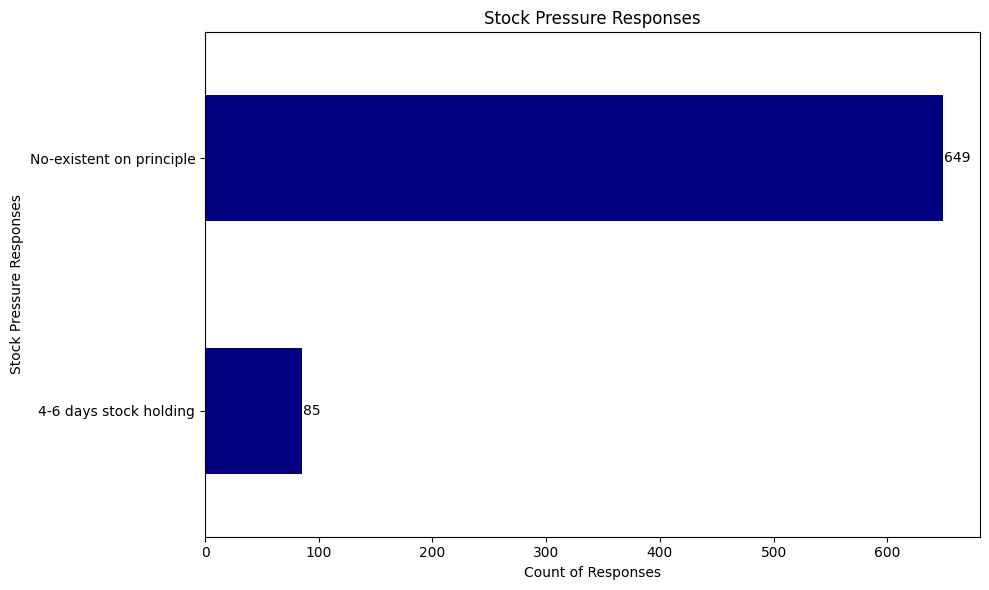

In [184]:

Stock_Pressure_counts = data['Stock Pressure'].value_counts()
top_Stock_Pressure_counts = Stock_Pressure_counts.nlargest(15).sort_values(ascending=True)


plt.figure(figsize=(10, 6))
ax = top_Stock_Pressure_counts.plot(kind='barh', color='#000080')

plt.title('Stock Pressure Responses')
plt.xlabel('Count of Responses')
plt.ylabel('Stock Pressure Responses')
plt.grid(False)


for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


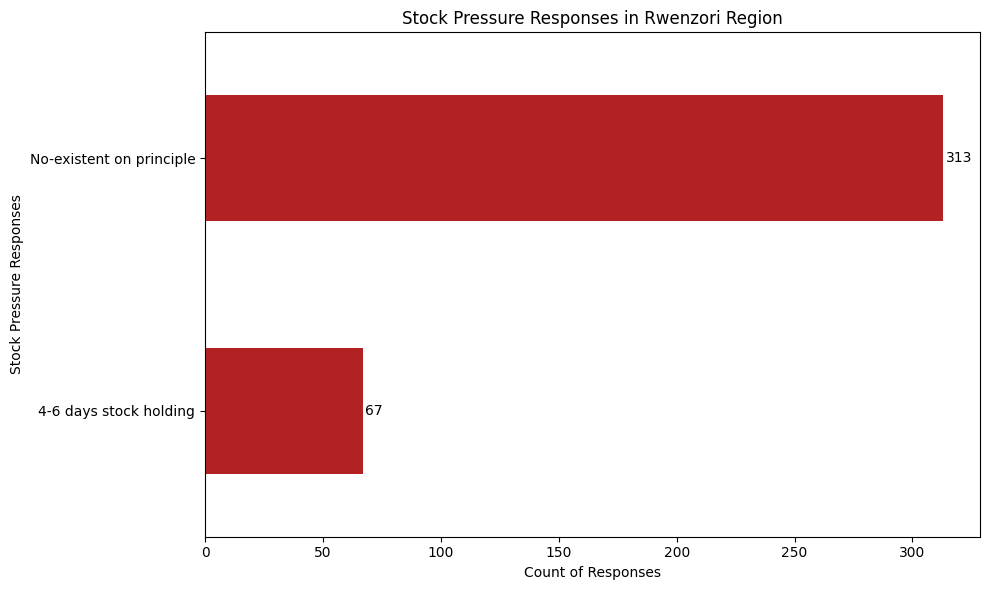

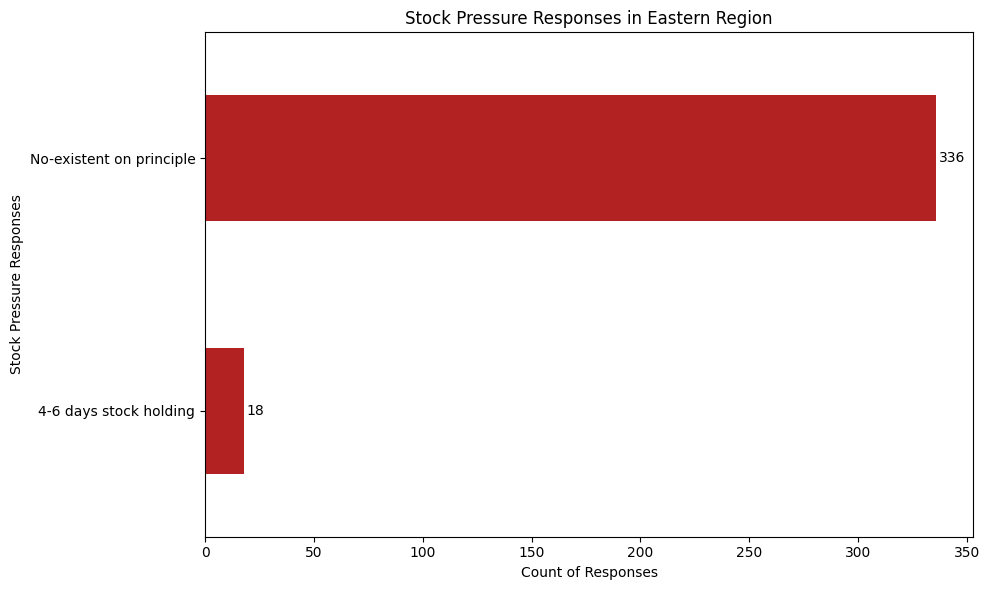

In [185]:

unique_regions = data['What is the Outlet Region ?'].unique()


for region in unique_regions:

    region_data = data[data['What is the Outlet Region ?'] == region]
    

    Stock_Pressure_counts = region_data['Stock Pressure'].value_counts()
    top_Stock_Pressure_counts = Stock_Pressure_counts.nlargest(15).sort_values(ascending=True)

  
    plt.figure(figsize=(10, 6))
    ax = top_Stock_Pressure_counts.plot(kind='barh', color='#B22222')

    plt.title(f'Stock Pressure Responses in {region}')
    plt.xlabel('Count of Responses')
    plt.ylabel('Stock Pressure Responses')
    plt.grid(False)
    
 
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black')
 
    plt.tight_layout()
    plt.show()


In [186]:
data.columns.to_list()

['Timestamp',
 'What is the Outlet Name?',
 'What is the Outlet Region ?',
 'What is the Outlet Location ?',
 'What is the  Identifying Mark?',
 "What is the  sales representative's name?",
 'What is the Last Delivery Date?',
 'Is the Shelf display present ? If yes: Where is the display?',
 'Select type of channel',
 'Is the Retailer Aware of any promo?',
 'Is the Current Poster for the current Promo?',
 'Is the Shelf display present ?  \nIf yes: Where is the display?',
 'What Through-the-Line support is available?  ',
 'Are Consumers and Gate Keepers Brand aware?',
 'Is Brand Positioning & Benefits clearly communicated?',
 'Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?',
 'Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?',
 'Incentives: Are there Salesman penetration & stocking incentives?',
 'Are sales incentives sales performance (sell-in/sell-out) or trade execution based?',
 "what's the delivery fr

In [187]:
data['Incentives: Are there Salesman penetration & stocking incentives?'].value_counts()

Incentives: Are there Salesman penetration & stocking incentives?
No                                            357
Yes                                           110
Not applicable                                 28
Not applicable                                 22
not applicable                                 15
This is a prospect                              4
no applicable                                   4
Prospective client                              3
New prospective client                          2
Not aware                                       2
Talked about discount                           2
No incentives                                   2
Not sure                                        1
This is a  new Prospect                         1
This is a new prospect                          1
The trader has no ideal about the products      1
Not applicable for customer                     1
New client                                      1
Has movit products                

In [188]:
data['Incentives: Are there Salesman penetration & stocking incentives?'] = data['Incentives: Are there Salesman penetration & stocking incentives?'].replace ({
    
    'Not applicable': 'Not applicable',
    'Not applicable ': 'Not applicable',
    'not applicable ': 'Not applicable',
    'not applicable': 'Not applicable',
    'no applicable': 'Not applicable',
    'not appplicable  ': 'Not applicable',
    'not appplicable': 'Not applicable',
    'Not applicable for customer': 'Not applicable'
  
})

In [189]:
data.columns.to_list()

['Timestamp',
 'What is the Outlet Name?',
 'What is the Outlet Region ?',
 'What is the Outlet Location ?',
 'What is the  Identifying Mark?',
 "What is the  sales representative's name?",
 'What is the Last Delivery Date?',
 'Is the Shelf display present ? If yes: Where is the display?',
 'Select type of channel',
 'Is the Retailer Aware of any promo?',
 'Is the Current Poster for the current Promo?',
 'Is the Shelf display present ?  \nIf yes: Where is the display?',
 'What Through-the-Line support is available?  ',
 'Are Consumers and Gate Keepers Brand aware?',
 'Is Brand Positioning & Benefits clearly communicated?',
 'Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?',
 'Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?',
 'Incentives: Are there Salesman penetration & stocking incentives?',
 'Are sales incentives sales performance (sell-in/sell-out) or trade execution based?',
 "what's the delivery fr

In [190]:
x = data['Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?'].unique()
print(x)


['Good' 'To an extent'
 'She says most of the shops are selling some Movit products'
 'Good penetration' nan 'Moderate' 'They are fairly well penetrated'
 'Small retail trade have more products of movit'
 'Small shops have more products of movit compared to others '
 'outlets are well penetrated in the market' 'High' 'prospective client'
 'Almost all small shops around have the product ' 'Medium '
 'well penetrated' 'New prospective client' 'Proper display '
 'To an extent especially on the New baby petroleum jelly with the coco butter scent but coming in from demand pressure by the customers.'
 'Low penetration as New products have not penetrated the market '
 'Yes the new products are listed in the shops '
 'The new products are both in supermarkets and wholesale shops '
 'Not varsitly penetrated '
 'To an extent, because even the new products are not known by gatekeeper.'
 'Market not well penetrated '
 'Good thus to the side of the coco butter petroleum jelly.'
 'New products have 

In [191]:
def classify_penetration(value):
    if pd.isna(value):
        return 'Low Penetration' 
    
    value = str(value).lower() 
    
    if any(keyword in value for keyword in ['good', 'well', 'high', 'most shops', 'clear penetration', 'breakthrough']):
        return 'High Penetration'
    
   
    elif any(keyword in value for keyword in ['low', 'poor', 'not well', 'no products', 'not aware', 'not']):
        return 'Low Penetration'
    
    
    else:
        return 'Low Penetration'


In [192]:

data['Penetration Group'] = data['Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?'].apply(classify_penetration)

In [193]:
print(data['Penetration Group'].value_counts())

Penetration Group
Low Penetration     602
High Penetration    132
Name: count, dtype: int64


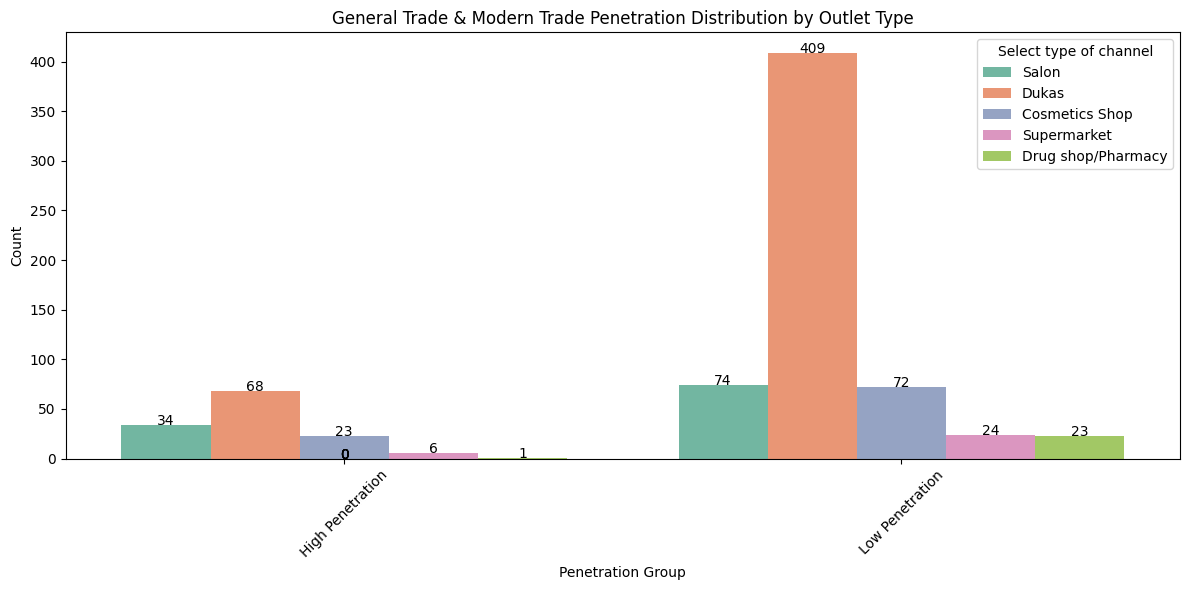

In [194]:
plt.figure(figsize=(12, 6))


ax = sns.countplot(data=data, x='Penetration Group', hue='Select type of channel', palette='Set2')

plt.title('General Trade & Modern Trade Penetration Distribution by Outlet Type')
plt.xlabel('Penetration Group')
plt.ylabel('Count')


plt.xticks(rotation=45)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black')

plt.tight_layout()
plt.show()


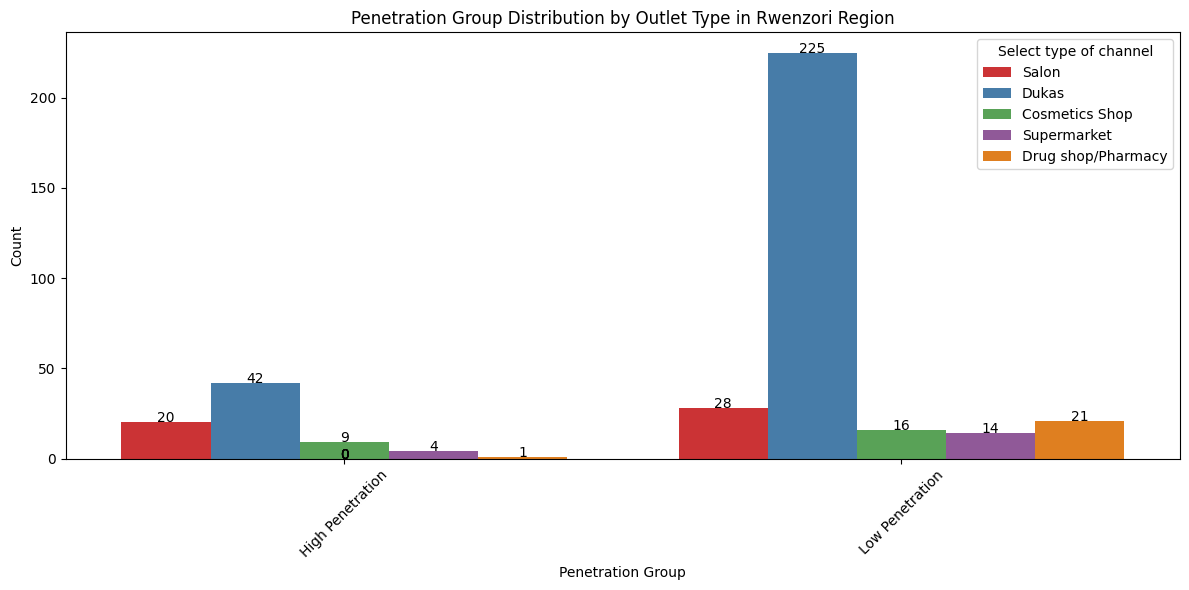

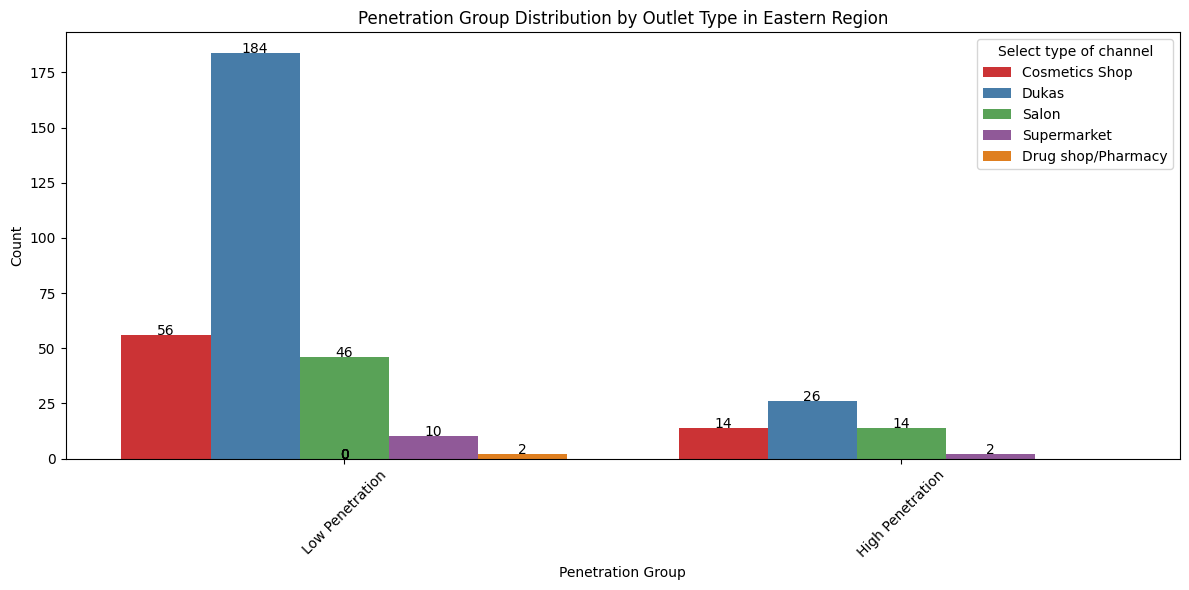

In [199]:

regions = data['What is the Outlet Region ?'].unique()


for region in regions:
   
    region_data = data[data['What is the Outlet Region ?'] == region]
    
 
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=region_data, x='Penetration Group', hue='Select type of channel', palette='Set1')
    

    plt.title(f'Penetration Group Distribution by Outlet Type in {region}')
    plt.xlabel('Penetration Group')
    plt.ylabel('Count')
    
 
    plt.xticks(rotation=45)

  
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()


In [195]:
data.columns.to_list()

['Timestamp',
 'What is the Outlet Name?',
 'What is the Outlet Region ?',
 'What is the Outlet Location ?',
 'What is the  Identifying Mark?',
 "What is the  sales representative's name?",
 'What is the Last Delivery Date?',
 'Is the Shelf display present ? If yes: Where is the display?',
 'Select type of channel',
 'Is the Retailer Aware of any promo?',
 'Is the Current Poster for the current Promo?',
 'Is the Shelf display present ?  \nIf yes: Where is the display?',
 'What Through-the-Line support is available?  ',
 'Are Consumers and Gate Keepers Brand aware?',
 'Is Brand Positioning & Benefits clearly communicated?',
 'Listing Drive: How well penetrated are General Trade & Modern Trade retail outlets?',
 'Stock Pressure: How well stocked are retail outlets vs standard? Is there a stocking standard?',
 'Incentives: Are there Salesman penetration & stocking incentives?',
 'Are sales incentives sales performance (sell-in/sell-out) or trade execution based?',
 "what's the delivery fr

In [196]:
data['Is POSM readily available and refreshed frequently enough to reflect freshness?'].value_counts()

Is POSM readily available and refreshed frequently enough to reflect freshness?
No                                       131
Yes                                       50
Not available                             34
Not                                       31
Not applicable                            22
                                        ... 
NA                                         1
No, there are no posters in the shops      1
No current posters                         1
Non                                        1
not freshly often                          1
Name: count, Length: 108, dtype: int64

In [197]:
data.iloc[:,20:38].columns.to_list()

['Are there Distributor/Stockiest loyalty Programs (e.g., the more you buy/sell, the more you earn in margins)?',
 'Are there tech tools used to track RTM effectiveness – retail stock, trade execution, call completion etc.?',
 'How disruptive or clear is the POSM – to stand out, drive education & awareness?',
 'How well executed is the POSM in retail outlets vs standard?',
 'Is there a retail execution standard that merchandisers follow?',
 'Is POSM readily available and refreshed frequently enough to reflect freshness?',
 'Does current pricing and margin structure suit competitiveness?',
 'Are prices & margin structures well communicated?',
 'What’s the level of price and margin structure compliance?',
 'Are retail promotions tailored and targeted based on channel & outlet prioritization & performance?',
 'How is sampling targeting consumers differentiated from gatekeepers?',
 'How are strategic partnerships (adjacencies) & New-to-World channels managed?',
 'What Influencer Digital or